In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import sys
import matplotlib.pyplot as plt
import torch
from collections import OrderedDict
sys.path.append('..')
import utils
import numpy as np

In [3]:
class Arguments:

    def __init__(self):
        
        self.project = 'mask2former4bev'
        self.model_name = 'mask2former4bev'
        self.dataset_path = '/datasets/nuscenes'
        self.version = 'trainval'

        # write all the parameters like above
        self.res_scale = 1
        self.H = 1600
        self.W = 900
        self.rand_crop_and_resize = 0
        
        self.resize_to = [448,800]
        self.crop_offset = 0
        self.random_flip = 0
        self.resize_lim = [1.0, 1.0]
        self.cams = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']
        self.ncams = 6

        self.do_shuffle_cams = 0
        self.refcam_id = 1

        self.backbone = "res101-simplebev"
        self.freeze_backbone = 0
        self.patch_size = 16

        self.mask_classification = 0
        self.class_weight = 1.0
        self.dice_weight = 1.0
        self.mask_weight = 20.0
        self.no_object_weight = 0.1
        self.deep_supervision = 1

        self.train_num_points = 112*112
        self.oversample_ratio = 3.0
        self.importance_sample_ratio = 0.75

        self.sem_seg_head_name = 'mask_former_head'
        self.transformer_in_feature = 'multi_scale_bev_features'

        self.bev_module_name = 'SimpleBEV'
        self.bev_latent_dim = 128
        self.multiscale_feature_channels = [64, 128, 256]
        self.multiscale_feature_norm = 'batch'
        self.multiscale_conv_dim = 256
        self.voxel_size = [200, 8, 200]
        self.bounds = [-50, 50, -5, 5, -50, 50]
        self.do_rgb_compress = 1

        self.use_frozen_bev_feats = 0
        self.frozen_bev_feats_path = '/kuacc/users/mbarin22/hpc_run/mask2former4bev/checkpoints/simplebev/8x5_5e-4_rgb12_22:43:46/model-000025000.pth'

        self.num_classes = 1

        self.predictor_type = 'TransformerPredictor'
        self.nheads = 8
        self.dec_layers = 6
        self.pe_hidden_dim = 256
        self.predictor_dropout = 0
        self.num_queries = 2
        self.pre_norm = 0
        self.dim_feedforward = 2048
        self.enforce_input_project = 0
        self.mask_dim = 256
        
        self.use_multiscale_features = 1
        self.rt_regression = 0
        self.translation_weight =1
        self.heading_weight = 1

        self.use_lidar = 1

        self.decoder_type = 'conv'

        self.learning_rate = 4e-4
        self.weight_decay = 1e-7
        self.dropout = 0.0
        
        self.is_loss_weights_param = 0
        self.validate_with_gt = 0
        self.use_center_offset_loss = 1
        self.center_offset_weight = 0.5
        
        self.inference = 'sem_seg'
        self.get_sem_masks = 0


args = Arguments()

In [4]:
ckpt_path = "/kuacc/users/mbarin22/hpc_run/mask2former4bev/checkpoints/[448, 800]_bs:16_nq:2_backbone:res101-simplebev_cls:0-center-offset:0.5-bce:1.0-empty:0.8_pts:12544_20k/best.pt"  #[448, 800]_bs:16_nq:100_backbone:res101-simplebev_offset-center:0.5-bce:1.0_cls:1-empty:0.8_pts:12544_20k/best.pt" 

In [5]:
from dataset import NuScenesDatasetWrapper

datamodule = NuScenesDatasetWrapper(args)

Loading NuScenes version trainval from /datasets/nuscenes
Done loading NuScenes version trainval


In [8]:
from models.mask2former4bev import Mask2Former4BEV

model = Mask2Former4BEV(args).cuda()
loaded_model = OrderedDict((key.replace('module.', ''), value) for key, value in torch.load(ckpt_path)["model"].items()) 

model.load_state_dict(loaded_model,strict=True)
model.eval()

/kuacc/users/mbarin22/.conda/envs/mask2former/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/kuacc/users/mbarin22/.conda/envs/mask2former/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


idx: 0, in_channels: 64
idx: 1, in_channels: 128
idx: 2, in_channels: 256
lateral_convs 0: None
lateral_convs 1: Sequential(
  (0): Conv2d(128, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
lateral_convs 2: Sequential(
  (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
  (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
output_convs 0: Sequential(
  (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
)
output_convs 1: Sequential(
  (0): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (1): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
)
output_convs 2: Sequential(
  (0): Conv2d(256, 256, kernel_size

/kuacc/users/mbarin22/.conda/envs/mask2former/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Mask2Former4BEV(
  (backbone): SimpleBEVEncoder(
    (encoder): Encoder_res101(
      (backbone): Sequential(
        (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
        (4): Sequential(
          (0): Bottleneck(
            (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=Tru

In [6]:
valset = datamodule.val()
trainset = datamodule.train()

is_train False
is_train True


In [59]:
idx = 12000
sample = trainset[idx]

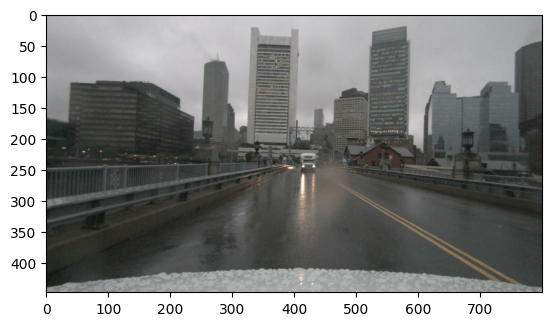

In [65]:
plt.imshow(sample['images'][4].detach().cpu().permute(1,2,0))

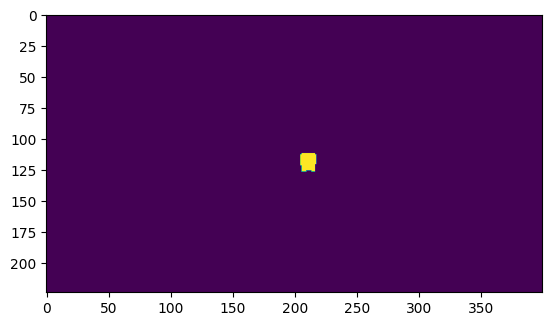

In [66]:
plt.imshow(np.load(f'/kuacc/users/mbarin22/hpc_run/mask2former4bev/sam_masks/train/{idx}.npz')['masks'][4])

In [11]:
out = model([sample]) #, training=False) #[0]

In [15]:
out[1][]

{'pred_logits': None,
 'pred_masks': tensor([[[[-16.5275, -16.8897, -17.3723,  ..., -22.3988, -20.5395, -16.7905],
           [-17.4002, -14.0577, -14.7654,  ..., -16.1527, -13.6960, -20.1752],
           [-17.3378, -14.0435, -14.9796,  ..., -19.4643, -16.6917, -23.4624],
           ...,
           [-15.0433,  -7.7040,  -8.8763,  ...,  -9.1566,  -8.0311,  -9.4202],
           [-14.1740,  -6.8272,  -7.8949,  ...,  -8.0439,  -7.3246,  -9.0593],
           [-13.3233, -11.9458, -12.6560,  ...,  -9.3110,  -8.4183,  -8.4171]],
 
          [[-16.4880, -16.8463, -17.3261,  ..., -22.3158, -20.4628, -16.7337],
           [-17.3677, -14.0339, -14.7376,  ..., -16.0671, -13.6180, -20.0999],
           [-17.3049, -14.0190, -14.9510,  ..., -19.3659, -16.6010, -23.3745],
           ...,
           [-15.0011,  -7.6789,  -8.8475,  ...,  -9.1362,  -8.0111,  -9.3884],
           [-14.1335,  -6.8041,  -7.8689,  ...,  -8.0261,  -7.3060,  -9.0286],
           [-13.2821, -11.9048, -12.6130,  ...,  -9.2924,  -

In [12]:
out[1]['aux_outputs']

[{'pred_masks': tensor([[[[ -7.6626,  -7.3996,  -8.0298,  ...,  -2.6475,  -2.8654,  -3.0092],
            [ -5.7498,  -4.0189,  -5.2003,  ...,  -2.6191,  -3.0519,  -3.8854],
            [ -5.5202,  -3.7557,  -5.2597,  ...,  -2.3448,  -2.7894,  -3.6880],
            ...,
            [ -1.7860,  -1.6141,  -1.4195,  ...,  -7.9875,  -6.8360,  -8.3022],
            [ -2.0091,  -1.9780,  -1.8165,  ...,  -6.1778,  -5.2988,  -6.8605],
            [ -2.4894,  -2.9732,  -2.7869,  ...,  -7.2429,  -6.5781,  -6.5811]],
  
           [[-16.6924, -16.1788, -17.2937,  ...,  -4.4406,  -4.6527,  -4.5937],
            [-14.7266, -11.3394, -13.2230,  ...,  -4.2982,  -4.7569,  -6.0971],
            [-14.4542, -11.1356, -13.6130,  ...,  -3.7988,  -4.3000,  -5.7330],
            ...,
            [ -1.6952,  -2.3645,  -2.0242,  ..., -12.6255, -10.4292, -11.7444],
            [ -1.9893,  -2.7966,  -2.4959,  ...,  -9.5997,  -7.9488,  -9.4673],
            [ -2.9710,  -3.7823,  -3.4566,  ..., -12.6853, -11.4344,

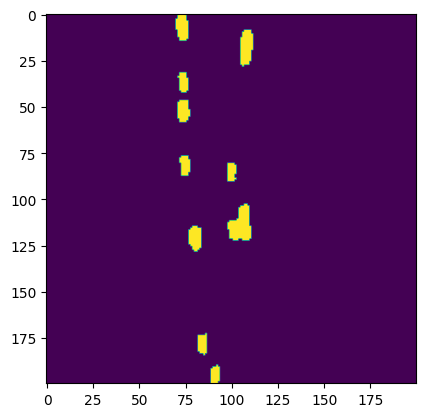

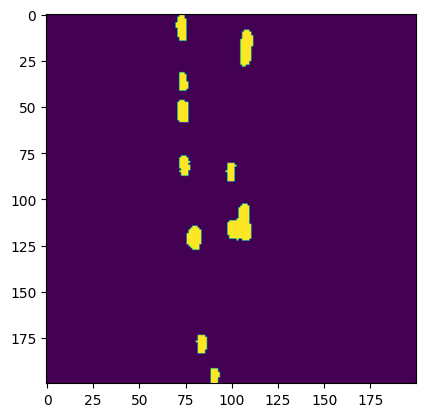

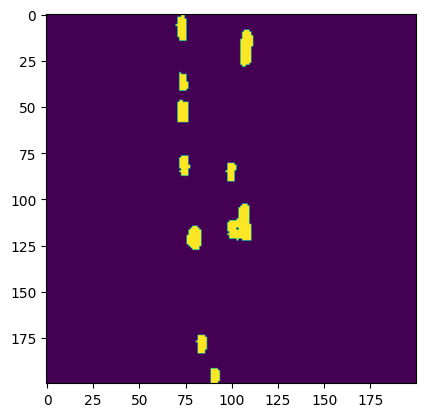

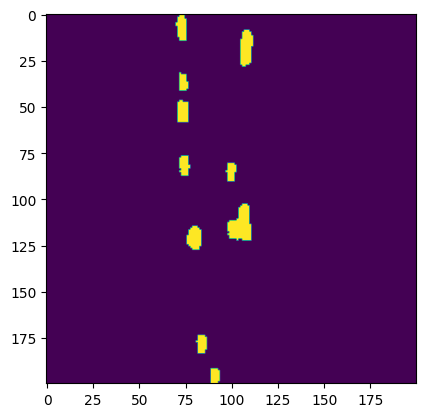

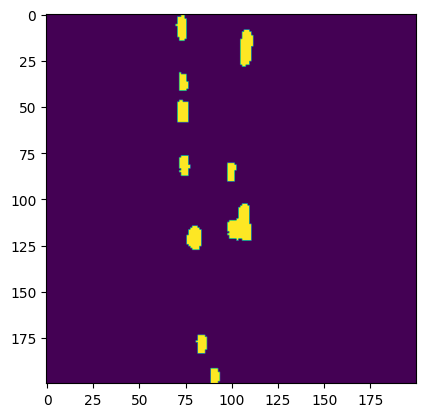

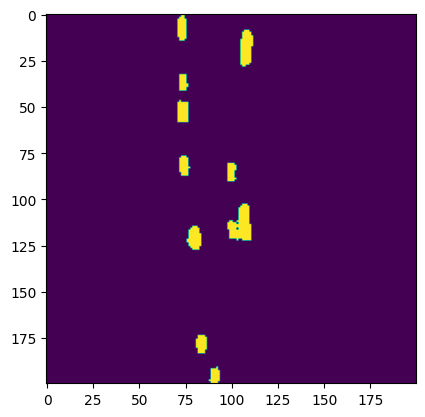

In [31]:
from torch.nn import functional as F

for layer in range(6):

    mask_pred_results = out[1]['aux_outputs'][layer]['pred_masks'] 
    #mask_cls = F.softmax(out[1]['aux_outputs'][layer]['pred_logits'], dim=-1)
    #B, num_queries = mask_pred_results.shape[:2]
    #mask_cls = torch.zeros((B, 2, 2))    # B, num_queries, 2
    #mask_cls = mask_cls.to(mask_pred_results.device)
    #mask_cls[:, 1, 1] = 1.0
    #mask_cls[:, 0, 0] = 1.0
    mask_pred = mask_pred_results.sigmoid()[0]                        # B, num_queries, H, W. region probability
    semseg = mask_pred #torch.einsum("bqc,bqhw->bchw", mask_cls, mask_pred)    # B, 2, H, W
    #semseg = semseg[:, 1]                                           # B, H, W

                                          # B, H, W
    plt.imshow(semseg[0].detach().cpu()>0.5)
    plt.show()

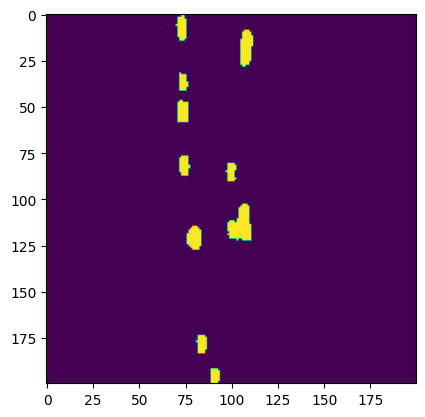

In [21]:
plt.imshow(out[1]['pred_masks'][0][1].detach().cpu()>0)

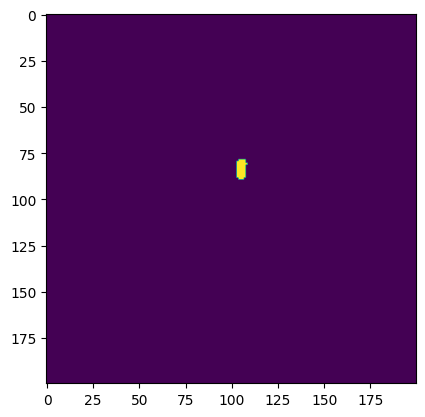

In [71]:
plt.imshow(out[0]['pred_query'][21].detach().cpu() > 0.5) 

In [ ]:
out[0]['pred_logits']

In [71]:
out.keys(), out['pred_logits'].shape, out['pred_query'].shape, sample.keys()

(dict_keys(['pred_masks', 'pred_query', 'pred_logits', 'pred_rt']),
 torch.Size([100, 2]),
 torch.Size([100, 200, 200]),
 dict_keys(['images', 'rots', 'trans', 'intrins', 'seg_bev', 'valid_bev', 'center_bev', 'offset_bev', 'ego_pose', 'multi_seg_bev', 'gt_masks', 'multi_valid_bev', 'gt_valid', 'translation_rotation_list']))

In [ ]:
 out['pred_logits']

In [16]:
out['pred_logits'][:10,:]                          #, out['pred_masks']

import matplotlib.pyplot as plt
import numpy as np

masks = out['pred_query'][indices].detach().cpu()
logits = out["pred_logits"][indices,1]

# Plotting
col = 5
rows = len(selected_indices) // (col*2)
fig, axes = plt.subplots(rows, col, figsize=(15, 6))


for i in range(rows):
    for j in range(col):
        idx = i * col + j
        axes[i, j].imshow(masks[idx, :, :], cmap='gray')
        axes[i, j].set_title(f'Mask {logits[idx]:.2f}')
        axes[i, j].axis('off')

plt.tight_layout()
plt.show()


NameError: name 'indices' is not defined

In [108]:
k = 51
values, indices = out['pred_logits'][:, 1].sort(descending=True)
indices = indices[:k]
indices[:k], values[:k]

(tensor([91, 82, 95, 25, 30, 73, 21, 87, 98, 94, 15, 67, 54,  9, 99, 58, 12, 84,
         40, 80, 69, 33, 27, 57, 51, 76, 74, 70, 50, 31, 81, 32, 56, 20,  2, 89,
         90, 64,  1, 36, 28, 88,  8,  6, 63, 34, 16, 37, 65, 52, 46],
        device='cuda:0'),
 tensor([0.9955, 0.9698, 0.4538, 0.3418, 0.3376, 0.2933, 0.2784, 0.2761, 0.2755,
         0.2657, 0.2578, 0.2565, 0.2523, 0.2482, 0.2398, 0.2360, 0.2350, 0.2301,
         0.2269, 0.2195, 0.2121, 0.2014, 0.2008, 0.2007, 0.1970, 0.1944, 0.1928,
         0.1871, 0.1860, 0.1802, 0.1784, 0.1780, 0.1739, 0.1661, 0.1570, 0.1524,
         0.1478, 0.1469, 0.1453, 0.1321, 0.1317, 0.1313, 0.1306, 0.1290, 0.1284,
         0.1208, 0.1203, 0.1146, 0.1136, 0.1130, 0.0972], device='cuda:0',
        grad_fn=<SliceBackward0>))

In [23]:
out['pred_query'].max(), out['pred_query'].unique()

(tensor(1.0000, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor([0.0000e+00, 2.9598e-39, 2.9642e-39,  ..., 1.0000e+00, 1.0000e+00,
         1.0000e+00], device='cuda:0', grad_fn=<Unique2Backward0>))

Selected masks indices: 68
1.0 0.0


Text(0.5, 1.0, 'Visualizing Contributions from Each Query')

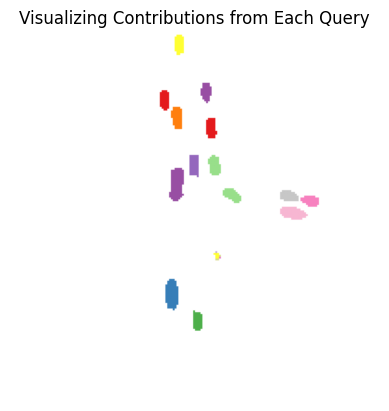

In [199]:
def get_combined_cmap_colors(num_queries, cmaps=['Set1','tab20']):
    colors = []
    for cmap_name in cmaps:
        cmap = plt.get_cmap(cmap_name)
        # Extend the list by the number of colors in the colormap
        colors.extend([cmap(i) for i in range(cmap.N)])
    
    # If more colors are needed than available, cycle through the colors
    if len(colors) < num_queries:
        # Repeat the color list to ensure enough colors
        colors = (colors * ((num_queries // len(colors)) + 1))[:num_queries]
    else:
        colors = colors[:num_queries]
    
    return colors

# import torch
import matplotlib.pyplot as plt
import numpy as np

# Example parameters
N = 100      # Number of queries
X, Z = 200, 200  # Dimensions of each mask

# Simulate data
class_scores = out['pred_logits'].detach().cpu()   # Random class scores for N queries
masks = out['pred_query'].detach().cpu()        # Random masks for N queries

# Step 1: Select actual mask scores (assuming index 1 represents actual masks)
actual_mask_scores = class_scores[:, 1].unsqueeze(1).unsqueeze(2)
actual_mask_scores = actual_mask_scores.expand(-1, X, Z)

# Step 2: Multiply scores with masks
weighted_masks = actual_mask_scores * masks

# Step 3: Binarize masks
threshold = 0.15
binary_masks = (weighted_masks > threshold).float()

# Initialize final selection array
selected = torch.zeros(N, dtype=torch.bool)

processed = []
# Step 2 and 3: Determine overlaps and select the largest mask
for i in range(N):
    for j in range(i + 1, N):
        if i in processed or j in processed:
            continue
        overlap = (binary_masks[i] * binary_masks[j]).sum()  # Calculate overlap
        if overlap > 10: 
            # Choose the larger mask
            if binary_masks[i].sum() > binary_masks[j].sum():
                selected[i] = True
                selected[j] = False
                processed.append(j)
            else:
                selected[j] = True
                selected[i] = False
                processed.append(i)
        else:
            # If no significant overlap, select both if not previously selected
            if not selected[i]:
                selected[i] = True
            if not selected[j]:
                selected[j] = True

# Filter masks based on selection
final_masks = binary_masks[selected]

# Further code to process final_masks can be added here

print("Selected masks indices:", len(final_masks))

# Step 4: Assign colors
colored_masks = np.ones((X, Z, 3))  # Initialize image with zeros
colors = get_combined_cmap_colors(len(final_masks))  # Get a colormap with N unique colors

for i in range(len(final_masks)):
    color_mask = np.array(colors[i][:3])  # Get RGB colors
    mask_slice = final_masks[i].numpy()
    for x in range(X):
        for z in range(Z):
            if mask_slice[x, z] == 1:
                colored_masks[x, z] = color_mask  # Assign color if the mask is active
print(colored_mask.max(), colored_mask.min())
# Display the result
plt.imshow(colored_masks)
plt.axis('off')
plt.savefig('query4.png')
plt.title("Visualizing Contributions from Each Query")
#plt.show()


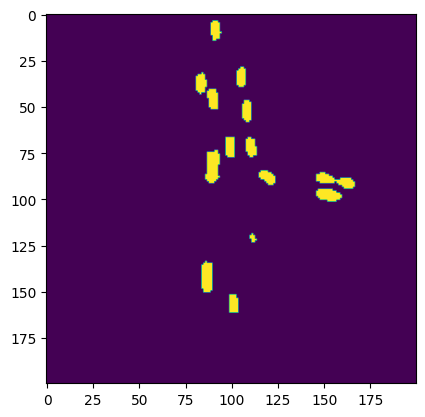

In [198]:
plt.imshow(out['pred_masks'].detach().cpu()[0]>0.5)

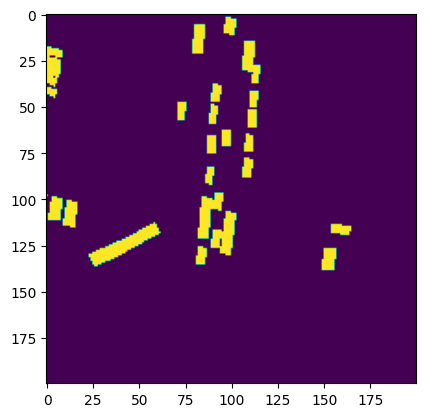

In [173]:
plt.imshow(sample['gt_masks'].detach().cpu()[0])

In [109]:
semseg = torch.einsum("qc,qhw->chw", out['pred_logits'][indices], out['pred_query'][indices])    # B, 2, H, W
semseg = semseg[1]
semseg.max(), semseg.mean()

(tensor(1.5586, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.0186, device='cuda:0', grad_fn=<MeanBackward0>))

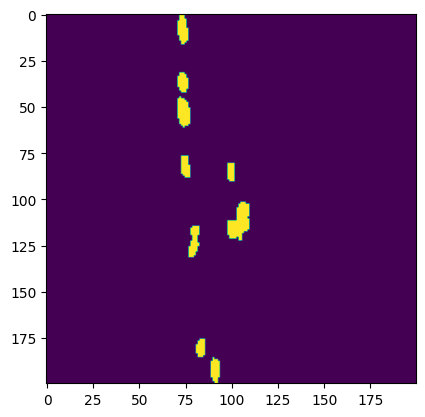

In [110]:
topk_query = out['pred_query'][indices].sum(0) > 0.1
topk_query.min(), topk_query.max() 
plt.imshow((semseg > 0.5).detach().cpu())

In [69]:
out['pred_query'].mean()

tensor(0.0017, device='cuda:0', grad_fn=<MeanBackward0>)

In [106]:
def nms(masks, scores, threshold):
    """
    Perform Non-Maximum Suppression (NMS) on masks.

    Args:
    - masks  : tensor of shape (N, X, Z).
    - scores : tensor of shape (N,) containing the confidence scores for each query.
    - threshold (float): Threshold for deciding whether masks overlap enough to be considered the same object.

    Returns:
    - indices: Indices of the selected bounding boxes after NMS.
    """

    sorted_indices = torch.argsort(scores, descending=True)
    selected_indices = []

    while len(sorted_indices) > 0:
        # Pick the box with the highest score
        current_index = sorted_indices[0]
        print(scores[current_index])
        selected_indices.append(current_index.item())

        # Calculate IoU (Intersection over Union) with all other boxes
        current_mask = masks[current_index]
        other_masks = masks[sorted_indices[1:]]
        ious = calculate_iou(current_mask.unsqueeze(0), other_masks)

        # Discard boxes with IoU greater than threshold
        filtered_indices = torch.where(ious <= threshold)[0]
        sorted_indices = sorted_indices[1:][filtered_indices]

    return torch.tensor(selected_indices)

def calculate_iou(mask, masks):
    """
    Calculate Intersection over Union (IoU) between a mask and a batch of masks.

    Args:
    - mask1 (torch.Tensor): Binary mask of shape (1, H, W).
    - masks (torch.Tensor): Batch of binary masks of shape (N, H, W).

    Returns:
    - torch.Tensor: IoU between mask1 and each mask in the batch, shape (N,).
    """

    # Convert the masks to dtype torch.bool in case they are not already
    mask = mask.bool()
    masks = masks.bool()

    # Calculate intersection and union
    intersection = (mask & masks).float().sum(dim=(1, 2))
    union = (mask | masks).float().sum(dim=(1, 2))

    # Calculate IoU
    iou = intersection / union
    return iou


boxes = (out['pred_query'] > 0.5)
scores = out['pred_logits'][:, 1]

threshold = 0.5

# Perform NMS
selected_indices = nms(boxes, scores, threshold)

tensor(0.9955, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.9698, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.4538, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.3418, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2784, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2761, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2755, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2360, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2269, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2195, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.2121, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.1871, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.1860, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.1524, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.1317, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.1290, device='cuda:0', grad_fn=<SelectBackward0>)
tensor(0.0972, device='cuda:0', grad_fn=<SelectBackward0

In [83]:
out['pred_query'][selected_indices,1] > 0.1, out['pred_query'][selected_indices].sum(0).max() 

(tensor([[False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         ...,
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False],
         [False, False, False,  ..., False, False, False]], device='cuda:0'),
 tensor(3.1563, device='cuda:0', grad_fn=<MaxBackward1>))

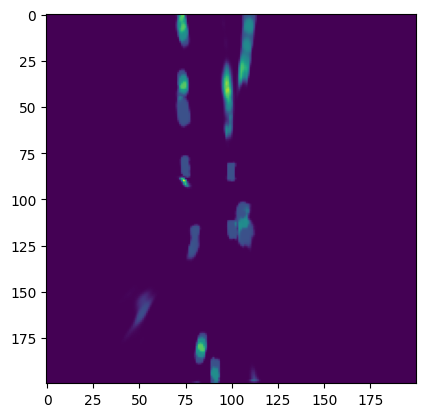

In [107]:
nms_query = out['pred_query'][selected_indices].sum(0) #> 0.5
plt.imshow(nms_query.detach().cpu())

In [26]:
semseg = torch.einsum("qc,qhw->chw", out['pred_logits'][selected_indices], out['pred_query'][selected_indices])    # B, 2, H, W
semseg = semseg[1]
semseg.max(), semseg.mean()

(tensor(0.6319, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.0122, device='cuda:0', grad_fn=<MeanBackward0>))

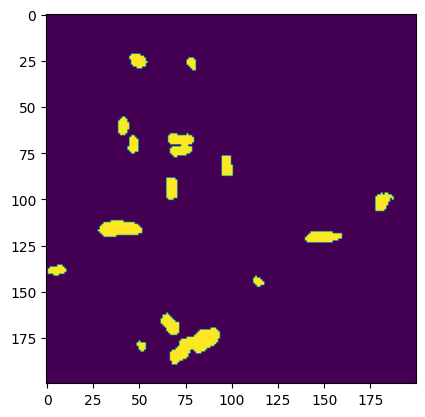

In [43]:
pred = semseg > 0.2 #.sigmoid()
plt.imshow(pred.detach().cpu().numpy(), cmap='viridis')

In [146]:
nms_query.min(), nms_query.max() 

(tensor(2.4220e-14, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(3.4675, device='cuda:0', grad_fn=<MaxBackward1>))

In [92]:
mask_cls = out['pred_logits']
mask_pred = out['pred_query']

In [101]:
from torch.nn import functional as F

# [Q, K]
scores = F.softmax(mask_cls, dim=-1)[:, :-1]
labels = torch.arange(1).unsqueeze(0).repeat(100, 1).flatten(0, 1)
# scores_per_image, topk_indices = scores.flatten(0, 1).topk(self.num_queries, sorted=False)
scores_per_image, topk_indices = scores.flatten(0, 1).topk(40, sorted=False)
labels_per_image = labels[topk_indices.detach().cpu()]

print(topk_indices)

topk_indices = topk_indices // 1
# mask_pred = mask_pred.unsqueeze(1).repeat(1, self.sem_seg_head.num_classes, 1).flatten(0, 1)
mask_pred = mask_pred[topk_indices]

# mask (before sigmoid)
pred_masks = (mask_pred > 0).float()

# calculate average mask prob
mask_scores_per_image = (mask_pred.sigmoid().flatten(1) *pred_masks.flatten(1)).sum(1) / (pred_masks.flatten(1).sum(1) + 1e-6)
scores = scores_per_image * mask_scores_per_image
pred_classes = labels_per_image


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [98]:
pred_masks.shape

torch.Size([40, 200, 200])

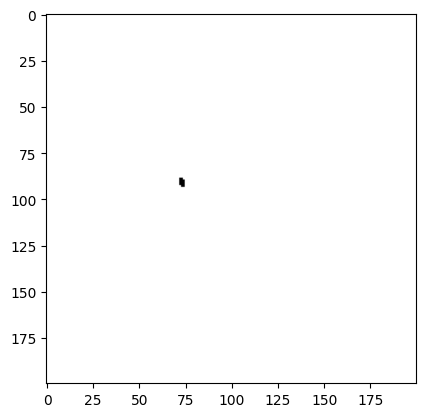

In [127]:
pred = out['pred_query'][0] > 0.5 #+ out['pred_query'][6] #.sigmoid()
plt.imshow(pred.detach().cpu().numpy(), cmap='binary')

In [36]:
semseg = torch.einsum("qc,qhw->chw", out['pred_logits'], out['pred_query'])    # B, 2, H, W
semseg = semseg[1]
semseg #out['pred_logits'],   

tensor([[4.6341e-07, 1.1851e-06, 2.2852e-07,  ..., 7.7344e-08, 1.5946e-07,
         1.6730e-07],
        [7.4345e-08, 3.1644e-06, 4.9332e-07,  ..., 1.3555e-07, 6.3993e-07,
         1.1241e-07],
        [5.7221e-08, 1.5512e-06, 1.9864e-07,  ..., 1.0816e-07, 1.0944e-06,
         2.4666e-07],
        ...,
        [1.6326e-08, 4.6741e-07, 2.5582e-06,  ..., 4.3182e-10, 1.4854e-08,
         4.8277e-09],
        [1.5892e-08, 6.5142e-07, 4.1462e-06,  ..., 1.8649e-09, 4.9844e-08,
         2.5361e-08],
        [6.6597e-07, 4.1080e-07, 1.5791e-06,  ..., 1.1738e-09, 1.1093e-08,
         4.3587e-07]], device='cuda:0', grad_fn=<SelectBackward0>)

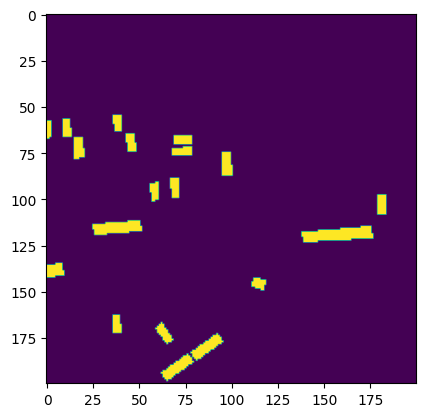

In [30]:
plt.imshow(sample['gt_masks'][0]*sample['gt_valid'][0], cmap='viridis')

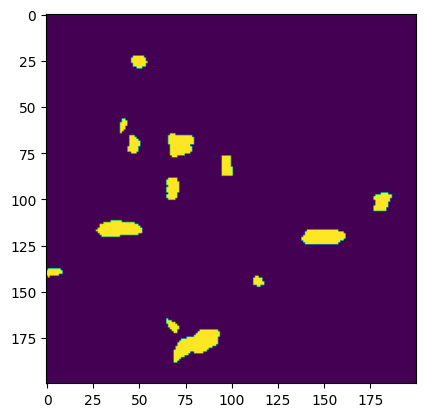

In [37]:
pred = out['pred_masks'][0] > 0.5 #.sigmoid()
plt.imshow(pred.detach().cpu().numpy(), cmap='viridis')

In [112]:
def miou(pred, gt, valid):
        
    pred_round = (pred > 0.5).float()  
    if valid is None:
        valid = torch.ones_like(gt)

    intersection = (pred_round*gt*valid).sum(dim=[1,2])
    union = ((pred_round+gt)*valid).clamp(0,1).sum(dim=[1,2])
    iou = (intersection/(1e-4 + union)).mean()
    
    return iou*100

miou(out['pred_masks'][0].detach().cpu(), sample['gt_masks'], sample['gt_valid']), miou(semseg.detach().cpu(), sample['gt_masks'], sample['gt_valid'])

(tensor(47.7190), tensor(43.3240))

tensor(47.2344)


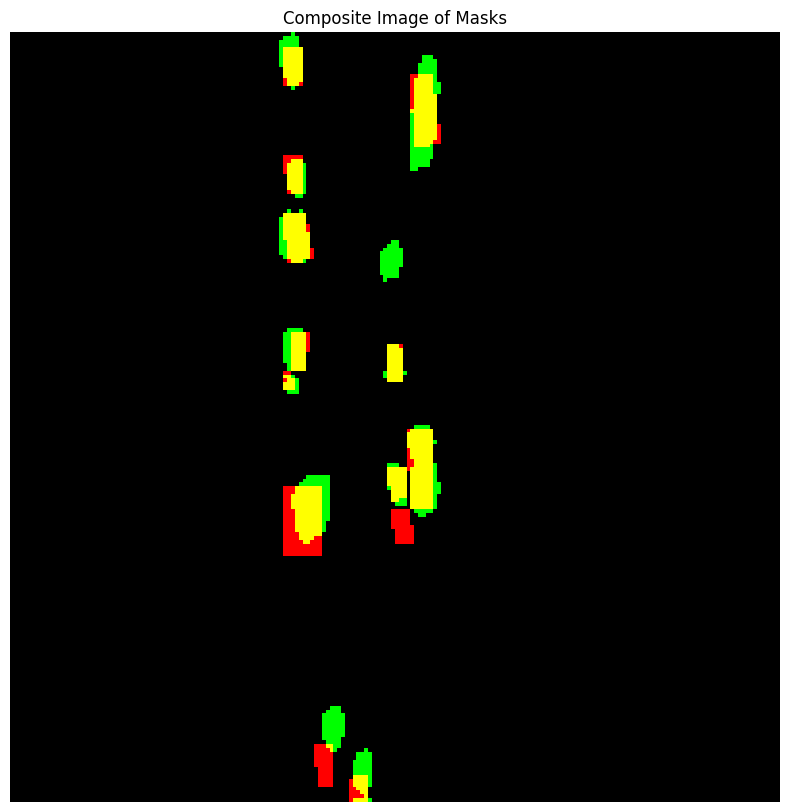

In [149]:
idx = 0
batch = valset[idx]
preds = model([batch], training=False)  # a dictionary of losses
our_pred = nms_query.detach().cpu() # (preds[0]['pred_masks']> 0.5).detach().cpu()

import matplotlib.pyplot as plt
import numpy as np

# Sample binary masks
ground_truth = (batch['gt_masks'].cpu()*batch['gt_valid'].cpu())[0]
model_pred_1 = our_pred#[0]

print(miou(preds[0]['pred_masks'].detach().cpu(), batch['gt_masks'], batch['gt_valid']))

# Creating an empty image with 3 channels (RGB)
composite_image = np.zeros((ground_truth.shape[0], ground_truth.shape[1], 3), dtype=np.uint8)

# Assigning each mask to a different channel (R, G, B)
composite_image[:, :, 0] = ground_truth * 255  # Red channel for ground truth
composite_image[:, :, 1] = model_pred_1 * 255  # Green channel for first model prediction

# Display the composite image
plt.figure(figsize=(10, 10))
plt.imshow(composite_image)
plt.title('Composite Image of Masks')
plt.axis('off')  # Hide axis
plt.show()

In [ ]:
plt.imshow((out['pred_query'][0].sigmoid() > 0.5).detach().cpu())

In [ ]:
plt.imshow(torch.argmax(out['pred_query'].sigmoid(), dim=0).detach().cpu(), cmap="jet")

In [ ]:
for j in range(50):
    z = out['pred_query'].sigmoid()[j] > 0.5
    if z.sum() > 0:
        plt.imshow(z.detach().cpu(), cmap="jet")
        plt.show()